In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

In [ ]:
!pip install mlxtend

In [ ]:
data = load_iris()
data.data


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
d = {
    'sepal length': data.data[50:, 1],  # Assuming you want the sepal length from index 50 onwards
    'petal length': data.data[50:, 2],  # Assuming you want the petal length from index 50 onwards
    'Species': np.array([i for i in data.target if i > 0])  # Filtered 'Species' data where i > 0
}

In [ ]:
df=pd.DataFrame(d)
df

,sepal length,petal length,Species
0,3.2,4.7,1
1,3.2,4.5,1
2,3.1,4.9,1
3,2.3,4.0,1
4,2.8,4.6,1
...,...,...,...
95,3.0,5.2,2
96,2.5,5.0,2
97,3.0,5.2,2
98,3.4,5.4,2


In [ ]:
df=df.sample(df.shape[0])

In [ ]:
df

,sepal length,petal length,Species
46,2.9,4.2,1
55,3.0,6.6,2
48,2.5,3.0,1
10,2.0,3.5,1
58,2.5,5.8,2
...,...,...,...
77,3.0,4.9,2
6,3.3,4.7,1
45,3.0,4.2,1
73,2.7,4.9,2


In [ ]:
df_train=df.iloc[:60,:].sample(10)

In [ ]:
df_train

,sepal length,petal length,Species
72,2.8,6.7,2
83,2.8,5.1,2
55,3.0,6.6,2
36,3.1,4.7,1
46,2.9,4.2,1
39,2.5,4.0,1
82,2.8,5.6,2
12,2.2,4.0,1
22,2.5,4.9,1
56,2.5,4.5,2


In [ ]:
df_test = df.iloc[61:,:].sample(10)

In [ ]:
df_test

,sepal length,petal length,Species
93,3.2,5.9,2
80,2.8,6.1,2
11,3.0,4.2,1
13,2.9,4.7,1
98,3.4,5.4,2
57,2.9,6.3,2
34,3.0,4.5,1
21,2.8,4.0,1
76,2.8,4.8,2
81,3.8,6.4,2


In [ ]:
df_tt=df_test.sample(5,replace=True)
X_test=df_tt.iloc[:,:-1].values

In [ ]:
y_test=df_tt.iloc[:,-1].values

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import numpy as np

def evaluate(model, X, y, X_test, y_test):
    model.fit(X, y)
    plot_tree(model)

    plt.show()
    plot_decision_regions(X, y, clf=model, legend=2)  # Updated argument name to 'legend'
    plt.show()

    y_pred = model.predict(X_test)
    print("Y_test:", y_test)
    print("y_pred:", y_pred)
    print("accuracy score", accuracy_score(y_test, y_pred))

    return model

# Assuming you have defined X_train, y_train, X_test, and y_test elsewhere



In [ ]:
#1
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

# Assuming you have already defined df_train DataFrame

# Sample 8 rows with replacement from df_train
df_t = df_train.sample(8, replace=True)

# Extract features (X_train) and target (y_train) from df_t
X_train = df_t.iloc[:, :-1].values
y_train = df_t.iloc[:, -1].values

# Create a DecisionTreeClassifier instance
dt = DecisionTreeClassifier()




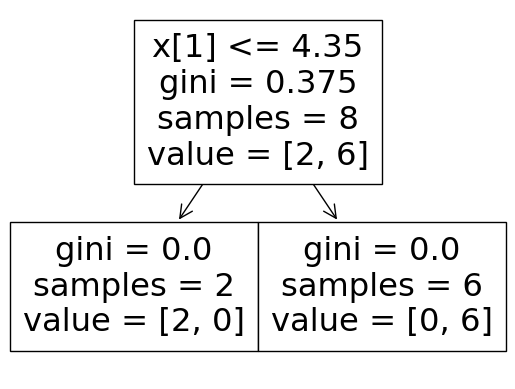

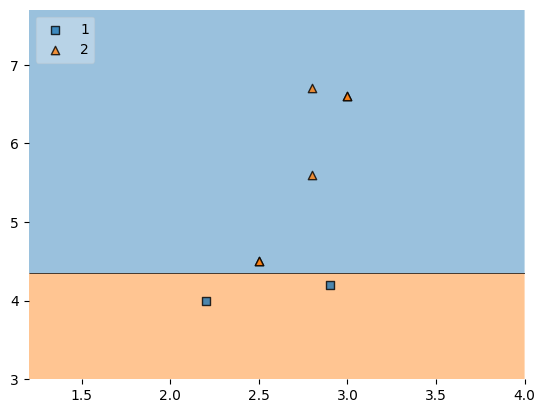

Y_test: [1 1 2 2 1]
y_pred: [1 1 2 2 1]
accuracy score 1.0


In [ ]:
bag1=evaluate(dt, X_train, y_train, X_test, y_test)

In [ ]:
#2
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

# Assuming you have already defined df_train DataFrame

# Sample 8 rows with replacement from df_train
df_t = df_train.sample(8, replace=True)

# Extract features (X_train) and target (y_train) from df_t
X_train = df_t.iloc[:, :-1].values
y_train = df_t.iloc[:, -1].values

# Create a DecisionTreeClassifier instance
dt = DecisionTreeClassifier()

# Fit the decision tree model using X_train and y_train


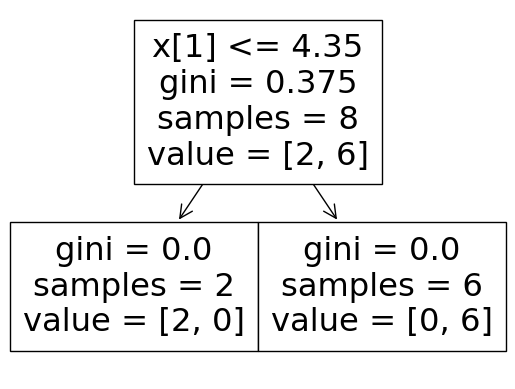

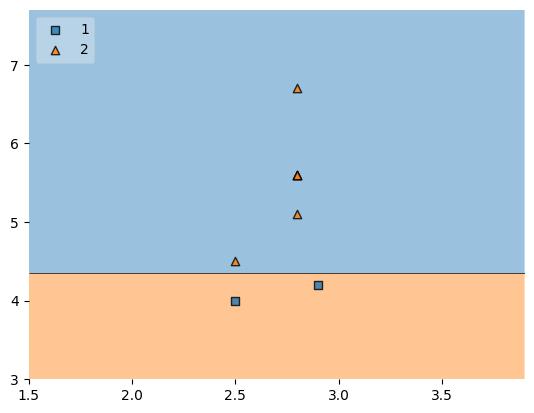

Y_test: [1 1 2 2 1]
y_pred: [1 1 2 2 1]
accuracy score 1.0


In [ ]:
bag2=evaluate(dt, X_train, y_train, X_test, y_test)

In [ ]:
#3
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

# Assuming you have already defined df_train DataFrame

# Sample 8 rows with replacement from df_train
df_t = df_train.sample(8, replace=True)

# Extract features (X_train) and target (y_train) from df_t
X_train = df_t.iloc[:, :-1].values
y_train = df_t.iloc[:, -1].values

# Create a DecisionTreeClassifier instance
dt = DecisionTreeClassifier()

# Fit the decision tree model using X_train and y_train


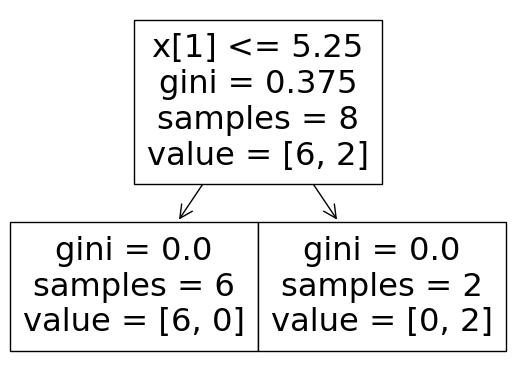

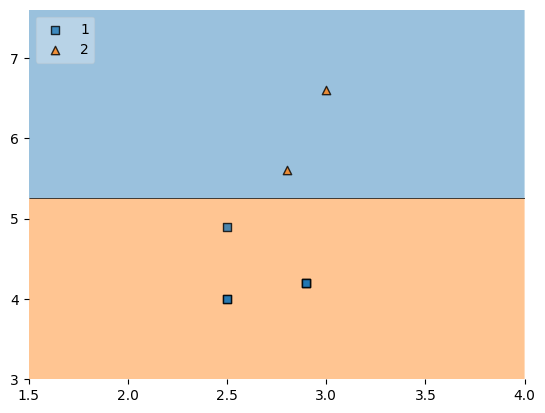

Y_test: [1 1 2 2 1]
y_pred: [1 1 2 2 1]
accuracy score 1.0


In [ ]:
bag3=evaluate(dt, X_train, y_train, X_test, y_test)

In [ ]:
#Agrrigation
print("Prediction 1",bag1.predict(np.array([2.5,4.9]).reshape(1,2)))
print("Prediction 2",bag2.predict(np.array([2.5,4.9]).reshape(1,2)))
print("Prediction 3",bag3.predict(np.array([2.5,4.9]).reshape(1,2)))

Prediction 1 [2]
Prediction 2 [2]
Prediction 3 [1]
